In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importing data

In [2]:
# Importing data
path = "" 
data_train = pd.read_csv(path + "train.csv")

print("This is first five rows of train csv")
print(data_train.head())

print("This is shape of train csv")
print(data_train.shape)

This is first five rows of train csv
       vidid  adview    views likes dislikes comment   published duration  \
0  VID_18655      40  1031602  8523      363    1095  2016-09-14  PT7M37S   
1  VID_14135       2     1707    56        2       6  2016-10-01  PT9M30S   
2   VID_2187       1     2023    25        0       2  2016-07-02  PT2M16S   
3  VID_23096       6   620860   777      161     153  2016-07-27  PT4M22S   
4  VID_10175       1      666     1        0       0  2016-06-29    PT31S   

  category  
0        F  
1        D  
2        C  
3        H  
4        D  
This is shape of train csv
(14999, 9)


#  Assigning each category a number for Category feature

In [3]:
# Assigning each category a number for Category feature
category={'A': 1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
data_train["category"]=data_train["category"].map(category)
print(data_train.head())

       vidid  adview    views likes dislikes comment   published duration  \
0  VID_18655      40  1031602  8523      363    1095  2016-09-14  PT7M37S   
1  VID_14135       2     1707    56        2       6  2016-10-01  PT9M30S   
2   VID_2187       1     2023    25        0       2  2016-07-02  PT2M16S   
3  VID_23096       6   620860   777      161     153  2016-07-27  PT4M22S   
4  VID_10175       1      666     1        0       0  2016-06-29    PT31S   

   category  
0         6  
1         4  
2         3  
3         8  
4         4  


# Removing character "F" present in data 

In [4]:
# Removing character "F" present in data
data_train=data_train[data_train.views!='F']
data_train=data_train[data_train.likes!='F']
data_train=data_train[data_train.dislikes!='F']
data_train=data_train[data_train.comment!='F']

print(data_train.head())

       vidid  adview    views likes dislikes comment   published duration  \
0  VID_18655      40  1031602  8523      363    1095  2016-09-14  PT7M37S   
1  VID_14135       2     1707    56        2       6  2016-10-01  PT9M30S   
2   VID_2187       1     2023    25        0       2  2016-07-02  PT2M16S   
3  VID_23096       6   620860   777      161     153  2016-07-27  PT4M22S   
4  VID_10175       1      666     1        0       0  2016-06-29    PT31S   

   category  
0         6  
1         4  
2         3  
3         8  
4         4  


# Convert values to integers for views, likes, comments, dislikes and adview

In [5]:
# Convert values to integers for views, likes, comments, dislikes and adview
data_train["views"] = pd.to_numeric(data_train["views"])
data_train["comment"] = pd.to_numeric(data_train["comment"])
data_train["likes"] = pd.to_numeric(data_train["likes"])
data_train["dislikes"] = pd.to_numeric(data_train["dislikes"])
data_train["adview"]=pd.to_numeric(data_train["adview"])

column_vidid=data_train['vidid']

# Endoding features like Category, Duration, Vidid

In [6]:
# Endoding features like Category, Duration, Vidid
from sklearn.preprocessing import LabelEncoder
data_train['duration']=LabelEncoder().fit_transform(data_train['duration'])
data_train['vidid']=LabelEncoder().fit_transform(data_train['vidid'])
data_train['published']=LabelEncoder().fit_transform(data_train['published'])
print(data_train.head())

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


   vidid  adview    views  likes  dislikes  comment  published  duration  \
0   5912      40  1031602   8523       363     1095       2168      2925   
1   2741       2     1707     56         2        6       2185      3040   
2   8138       1     2023     25         0        2       2094      1863   
3   9005       6   620860    777       161      153       2119      2546   
4    122       1      666      1         0        0       2091      1963   

   category  
0         6  
1         4  
2         3  
3         8  
4         4  


# Convert Time_in_sec for duration

In [7]:
# Convert Time_in_sec for duration
import datetime
import time

def checki(x):
    y = x[2:]
    h = ''
    m = ''
    s = ''
    mm = ''
    P = ['H','M','S']
    for i in y:
        if i not in P:
            mm+=i
        else:
            if(i=="H"):
                h = mm
                mm = ''
            elif(i == "M"):
                m = mm
                mm = ''
            else:
                s = mm
                mm = ''
    if(h==''):
        h = '00'
    if(m == ''):
        m = '00'
    if(s==''):
        s='00'
    bp = h+':'+m+':'+s
    return bp
train=pd.read_csv("train.csv")
mp = pd.read_csv(path + "train.csv")["duration"]
time = mp.apply(checki)

def func_sec(time_string):
    h, m, s = time_string.split(':')
    return int(h) * 3600 + int(m) * 60 + int(s)

time1=time.apply(func_sec)

data_train["duration"]=time1

print(data_train.head())

   vidid  adview    views  likes  dislikes  comment  published  duration  \
0   5912      40  1031602   8523       363     1095       2168       457   
1   2741       2     1707     56         2        6       2185       570   
2   8138       1     2023     25         0        2       2094       136   
3   9005       6   620860    777       161      153       2119       262   
4    122       1      666      1         0        0       2091        31   

   category  
0         6  
1         4  
2         3  
3         8  
4         4  


# Visualization

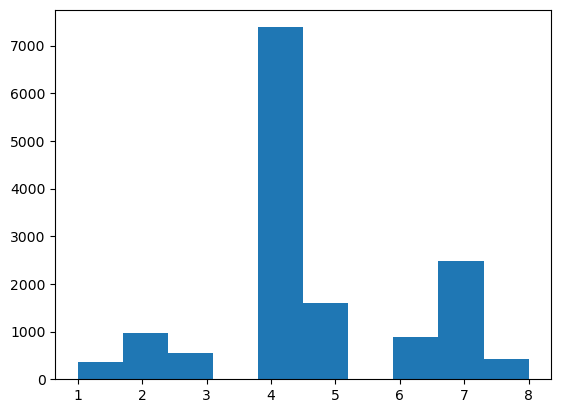

None


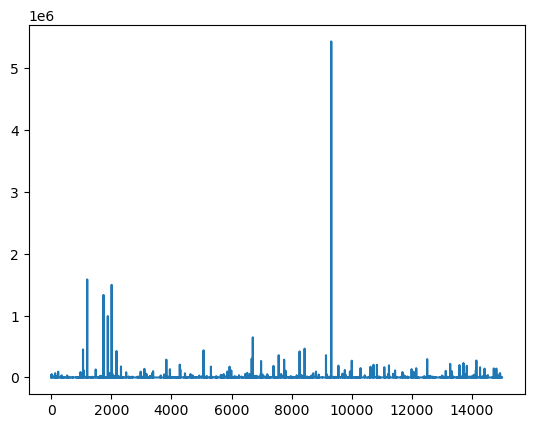

None


In [8]:
# Visualization
# Individual Plots
plt.hist(data_train["category"])
print(plt.show())

plt.plot(data_train["adview"])
print(plt.show())

# Remove videos with adview greater than 2000000 as outlier

In [9]:
# Remove videos with adview greater than 2000000 as outlier
data_train = data_train[data_train["adview"] <2000000]

# heatmap 

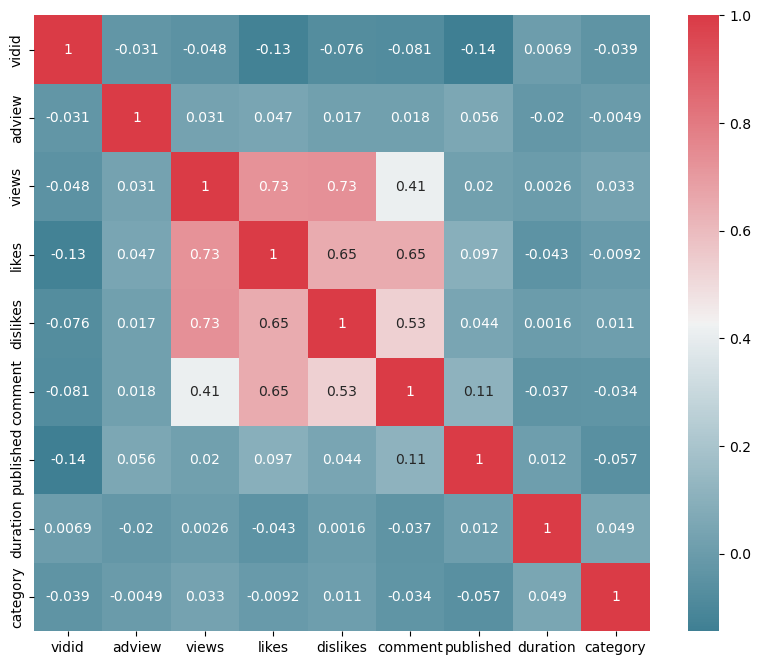

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

f, ax = plt.subplots(figsize=(10, 8))
corr = data_train.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, annot=True)
plt.show()


# Split Data and Drop unnecessary columns 

In [11]:
# Split Data
Y_train = pd.DataFrame(data=data_train.iloc[:,1].values,columns = ['target'])
# Drop unnecessary columns
data_train = data_train.drop(["adview"], axis=1)
data_train = data_train.drop(["vidid"], axis=1)
print(data_train.head())   
                       
# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_train, Y_train, test_size=0.2, random_state=42)
# Check the shape of the training data
print(X_train.shape)

print(X_train)

print(type(X_train))

print(X_train.describe())

     views  likes  dislikes  comment  published  duration  category
0  1031602   8523       363     1095       2168       457         6
1     1707     56         2        6       2185       570         4
2     2023     25         0        2       2094       136         3
3   620860    777       161      153       2119       262         8
4      666      1         0        0       2091        31         4
(11708, 7)
         views  likes  dislikes  comment  published  duration  category
13440    86739    117         9        4       1217       180         4
9523   1419766    887       362      232       1547      5811         7
3012     26086     19         0        9        966       178         6
1888    305445   3662        45      555       1484       257         7
11378   737649   1702        96       53       1127       895         4
...        ...    ...       ...      ...        ...       ...       ...
5316     31648    140        24       14       1925       231         7
13748

# Normalise Data

In [12]:
# Normalise Data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

print(X_train)
X_train.mean()

[[6.27970800e-04 4.12227296e-04 1.82005703e-04 ... 5.10700797e-01
  4.25360966e-03 4.28571429e-01]
 [1.02842406e-02 3.12517617e-03 7.32067383e-03 ... 6.49181704e-01
  1.37320699e-01 8.57142857e-01]
 [1.88608556e-04 6.69428942e-05 0.00000000e+00 ... 4.05371381e-01
  4.20634733e-03 7.14285714e-01]
 ...
 [1.48331209e-03 3.03004679e-04 7.07799956e-04 ... 5.19093580e-01
  5.15159392e-03 4.28571429e-01]
 [9.86119882e-03 4.87626135e-03 1.53087019e-02 ... 9.00125892e-01
  5.67147955e-03 8.57142857e-01]
 [2.87646701e-04 4.29843847e-04 1.21337135e-04 ... 9.39991607e-02
  8.36543233e-03 4.28571429e-01]]


0.1739096800320488

# Evaluation Metrics

In [13]:
# Evaluation Metrics
from sklearn import metrics
def print_error(X_test, y_test, model_name):
    prediction = model_name.predict(X_test)
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction))
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

# Linear Regression

In [14]:
# Linear Regression
from sklearn import linear_model
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X_train, y_train)

print(linear_regression.predict(X_test))
print_error(X_test,y_test, linear_regression)

[[-1041.40299121]
 [ 2737.25119825]
 [  393.4111476 ]
 ...
 [ -945.54652298]
 [ 2944.53211924]
 [-1497.73414422]]
Mean Absolute Error: 3707.378005824533
Mean Squared Error: 835663131.1210337
Root Mean Squared Error: 28907.83857573986


#  Decision Tree Regressor

In [15]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)
print_error(X_test,y_test, decision_tree)

Mean Absolute Error: 2960.5625
Mean Squared Error: 1209707211.9265711
Root Mean Squared Error: 34780.845474579415


# Support Vector Regressor

In [16]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
n_estimators = 200
max_depth = 25
min_samples_split=15
min_samples_leaf=2
random_forest = RandomForestRegressor(n_estimators = n_estimators, max_depth = max_depth, min_samples_split=min_samples_split)
random_forest.fit(X_train,y_train)
print_error(X_test,y_test, random_forest)

C:\Users\Tannu Antil\AppData\Local\Temp\ipykernel_8728\3179977126.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(X_train,y_train)


Mean Absolute Error: 3293.0785627285923
Mean Squared Error: 611045931.6124469
Root Mean Squared Error: 24719.34326822715


# Support Vector Regressor

In [17]:
# Support Vector Regressor
from sklearn.svm import SVR
supportvector_regressor = SVR()
supportvector_regressor.fit(X_train,y_train)
print_error(X_test,y_test, linear_regression)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Absolute Error: 3707.378005824533
Mean Squared Error: 835663131.1210337
Root Mean Squared Error: 28907.83857573986


# Artificial Neural Network

In [18]:
# Artificial Neural Network
import keras
from keras.layers import Dense
ann = keras.models.Sequential([
Dense(6, activation="relu",
input_shape=X_train.shape[1:]),
Dense(6,activation="relu"),
Dense(1)
])

optimizer=keras.optimizers.Adam()
loss=keras.losses.mean_squared_error
ann.compile(optimizer=optimizer,loss=loss,metrics=["mean_squared_error"])
history=ann.fit(X_train,y_train,epochs=100)
ann.summary()
print_error(X_test,y_test,ann)

C:\Users\Tannu Antil\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 860176896.0000 - mean_squared_error: 860176896.0000
Epoch 2/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 893676608.0000 - mean_squared_error: 893676608.0000
Epoch 3/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1307407616.0000 - mean_squared_error: 1307407616.0000
Epoch 4/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 582988736.0000 - mean_squared_error: 582988736.0000
Epoch 5/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1098689792.0000 - mean_squared_error: 1098689792.0000
Epoch 6/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 623932544.0000 - mean_squared_error: 623932544.0000
Epoch 7/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 404032832.0000 - mean_squared_error: 404032832.0000
Epoch 8/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1028405696.0000 - mean_squared_error: 1028405696.0000
Epoch 9/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 618486848.0000 - mean_squared

366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 849092608.0000 - mean_squared_error: 849092608.0000
Epoch 57/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 531642624.0000 - mean_squared_error: 531642624.0000
Epoch 58/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 669283392.0000 - mean_squared_error: 669283392.0000
Epoch 59/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1015116224.0000 - mean_squared_error: 1015116224.0000
Epoch 60/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1244215040.0000 - mean_squared_error: 1244215040.0000
Epoch 61/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 363484384.0000 - mean_squared_error: 363484384.0000
Epoch 62/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 417138208.0000 - mean_squared_error: 417138208.0000
Epoch 63/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1068747136.0000 - mean_squared_error: 1068747136.0000
Epoch 64/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1138852736.0000 - mean_squared_er

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 6)              │            48 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │            42 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 293 (1.15 KB)

 Trainable params: 97 (388.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 196 (788.00 B)

92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Mean Absolute Error: 3115.4005669300022
Mean Squared Error: 828956588.10878
Root Mean Squared Error: 28791.60620925446


# Saving Scikitlearn models and Saving Keras Artificial Neural Network model

In [19]:
#Saving Scikitlearn models
import joblib
joblib.dump(decision_tree, "decisiontree_youtubeadview.pkl")
# Saving Keras Artificial Neural Network model
ann.save("ann_youtubeadview.h5")